In [335]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns

In [336]:
df = pd.read_csv('dados_filtrados.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,TP_ESCOLA,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,1,1,1,24,1,4,NaN,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,1,1,1,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
2,1,0,0,0,21,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,0,0,25,1,9,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,0,28,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18301,2,1,1,1,17,2,0,1.0,0,398.3,558.2,511.6,NaN,1.0,500.0
18302,2,1,1,1,17,2,0,1.0,0,427.6,579.7,471.1,NaN,1.0,520.0
18303,1,1,1,1,19,1,2,NaN,0,639.2,643.8,604.9,NaN,1.0,640.0
18304,1,1,1,1,17,3,0,NaN,1,427.1,467.9,540.2,NaN,1.0,520.0


In [337]:
print(df.isna().sum())

TP_ESCOLA                0
TP_PRESENCA_CH           0
TP_PRESENCA_CN           0
TP_PRESENCA_LC           0
NU_IDADE                 0
TP_ST_CONCLUSAO          0
TP_ANO_CONCLUIU          0
TP_ENSINO            12544
IN_TREINEIRO             0
NU_NOTA_CN            4523
NU_NOTA_CH            4523
NU_NOTA_LC            4796
NU_NOTA_MT            8173
TP_STATUS_REDACAO     4796
NU_NOTA_REDACAO       4796
dtype: int64


In [338]:
# mat = df[df['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH'].notna()] # faltou 36 pras CN e CH
mat = df[df[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH']].notna().all(axis=1)]
mat

,TP_ESCOLA,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,1,1,1,24,1,4,NaN,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,1,1,1,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
5,1,1,1,1,18,1,1,NaN,0,439.7,583.2,410.9,364.5,1.0,620.0
6,2,1,1,1,18,2,0,1.0,0,420.1,604.2,484.5,529.2,1.0,560.0
7,1,1,1,1,18,1,1,NaN,0,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,1,1,1,20,1,3,NaN,0,438.2,419.7,394.5,403.2,1.0,440.0
13726,1,1,1,1,33,1,10,NaN,0,423.8,557.9,533.0,452.4,1.0,560.0
13727,1,1,1,1,15,3,0,NaN,1,460.5,528.9,569.3,398.0,1.0,600.0
13728,1,1,1,1,36,4,0,NaN,0,422.5,621.7,569.0,386.6,1.0,460.0


In [339]:
print(mat.isna().sum())
print(len(mat))

TP_ESCOLA               0
TP_PRESENCA_CH          0
TP_PRESENCA_CN          0
TP_PRESENCA_LC          0
NU_IDADE                0
TP_ST_CONCLUSAO         0
TP_ANO_CONCLUIU         0
TP_ENSINO            6469
IN_TREINEIRO            0
NU_NOTA_CN              0
NU_NOTA_CH              0
NU_NOTA_LC              0
NU_NOTA_MT              0
TP_STATUS_REDACAO       0
NU_NOTA_REDACAO         0
dtype: int64
10097


<AxesSubplot:>

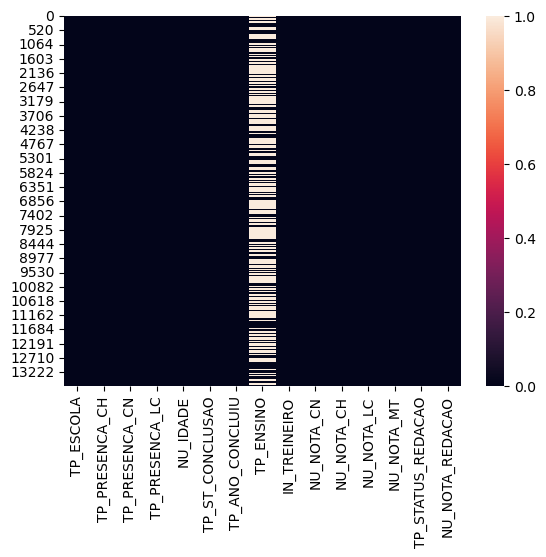

In [340]:
sns.heatmap(mat.isnull())

In [341]:
#pairplot = sns.pairplot(mat)
#pairplot.savefig('pairplot.jpg', dpi=300)

In [342]:
mat = mat.drop(columns=['TP_PRESENCA_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH'])
mat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,24,1,4,NaN,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
5,1,18,1,1,NaN,0,439.7,583.2,410.9,364.5,1.0,620.0
6,2,18,2,0,1.0,0,420.1,604.2,484.5,529.2,1.0,560.0
7,1,18,1,1,NaN,0,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,NaN,0,438.2,419.7,394.5,403.2,1.0,440.0
13726,1,33,1,10,NaN,0,423.8,557.9,533.0,452.4,1.0,560.0
13727,1,15,3,0,NaN,1,460.5,528.9,569.3,398.0,1.0,600.0
13728,1,36,4,0,NaN,0,422.5,621.7,569.0,386.6,1.0,460.0


In [343]:
mat = mat.fillna(0)

matnat = pd.DataFrame(mat)

notas = mat[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
matnat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,24,1,4,0.0,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
5,1,18,1,1,0.0,0,439.7,583.2,410.9,364.5,1.0,620.0
6,2,18,2,0,1.0,0,420.1,604.2,484.5,529.2,1.0,560.0
7,1,18,1,1,0.0,0,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,0.0,0,438.2,419.7,394.5,403.2,1.0,440.0
13726,1,33,1,10,0.0,0,423.8,557.9,533.0,452.4,1.0,560.0
13727,1,15,3,0,0.0,1,460.5,528.9,569.3,398.0,1.0,600.0
13728,1,36,4,0,0.0,0,422.5,621.7,569.0,386.6,1.0,460.0


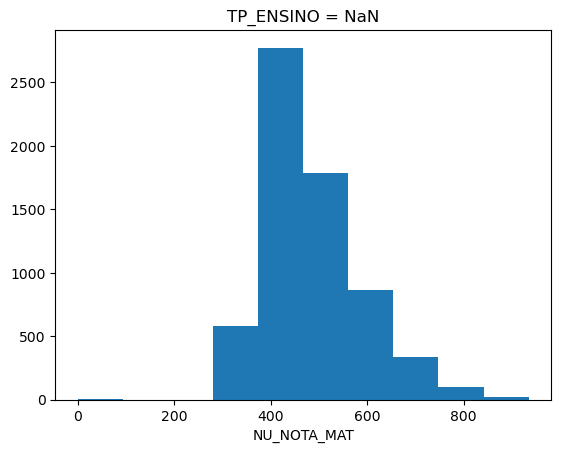

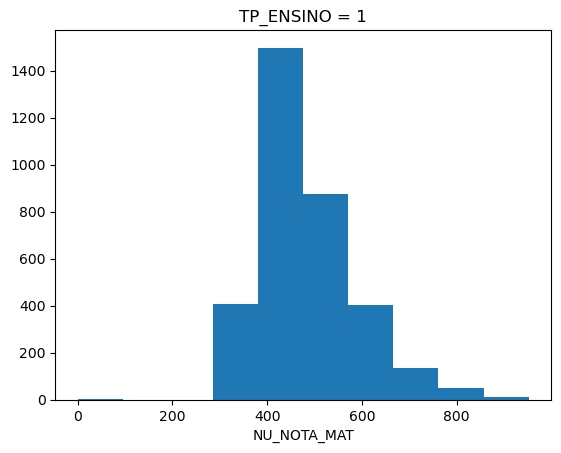

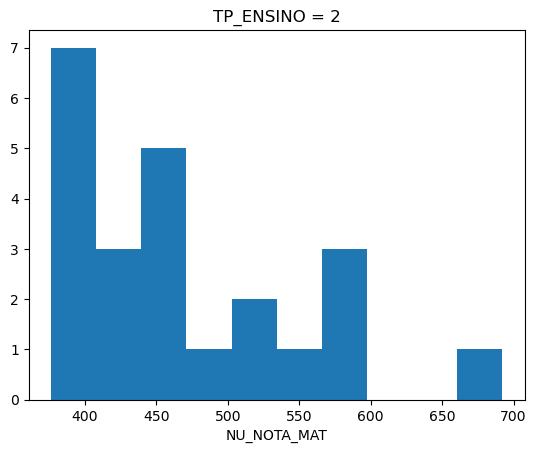

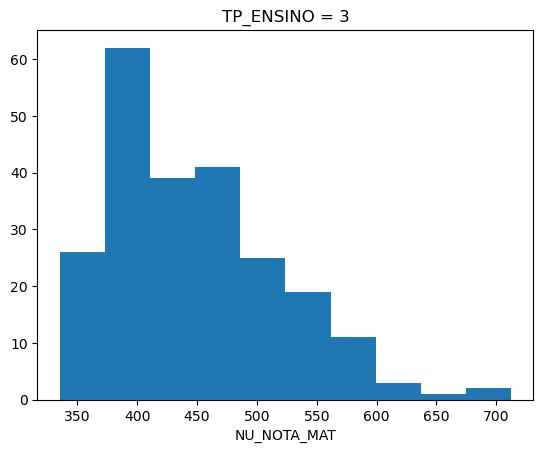

229


In [344]:
en0 = mat[mat['TP_ENSINO'] == 0]
en1 = mat[mat['TP_ENSINO'] == 1]
en2 = mat[mat['TP_ENSINO'] == 2]
en3 = mat[mat['TP_ENSINO'] == 3]

plt.hist(en0['NU_NOTA_MT'])
plt.xlabel('NU_NOTA_MAT')
plt.title('TP_ENSINO = NaN')
plt.show()
plt.hist(en1['NU_NOTA_MT'])
plt.xlabel('NU_NOTA_MAT')
plt.title('TP_ENSINO = 1')
plt.show()
plt.hist(en2['NU_NOTA_MT'])
plt.title('TP_ENSINO = 2')
plt.xlabel('NU_NOTA_MAT')
plt.show()
plt.hist(en3['NU_NOTA_MT'])
plt.title('TP_ENSINO = 3')
plt.xlabel('NU_NOTA_MAT')
plt.savefig
plt.show()
print(len(en3))

In [345]:
# print((mat['TP_PRESENCA_LC'] != 1).sum())
# print((mat['TP_PRESENCA_CH'] != 1).sum())
# print((mat['TP_PRESENCA_CN'] != 1).sum())

# TODOS TINHAM PRESENCA IGUAL A 1

In [346]:
mat['TP_ENSINO'] = mat['TP_ENSINO'].replace(0, 1)
mat['TP_ENSINO'] = mat['TP_ENSINO'].replace(2, 0)
mat['TP_ENSINO'] = mat['TP_ENSINO'].replace(3, 0)

mat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,24,1,4,1.0,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
5,1,18,1,1,1.0,0,439.7,583.2,410.9,364.5,1.0,620.0
6,2,18,2,0,1.0,0,420.1,604.2,484.5,529.2,1.0,560.0
7,1,18,1,1,1.0,0,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,1.0,0,438.2,419.7,394.5,403.2,1.0,440.0
13726,1,33,1,10,1.0,0,423.8,557.9,533.0,452.4,1.0,560.0
13727,1,15,3,0,1.0,1,460.5,528.9,569.3,398.0,1.0,600.0
13728,1,36,4,0,1.0,0,422.5,621.7,569.0,386.6,1.0,460.0


<AxesSubplot:>

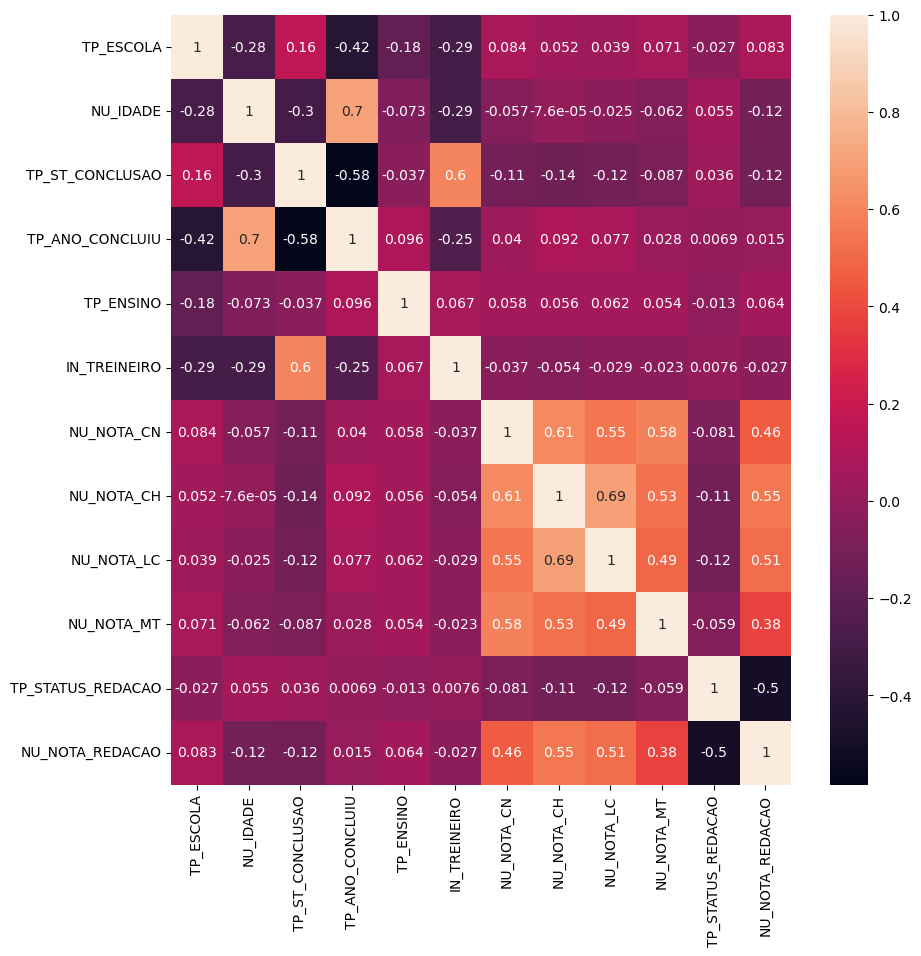

In [347]:
plt.figure(figsize=(10, 10))
sns.heatmap(mat.corr(), annot=True)

In [348]:
print('total', len(mat))
for i in range(9):
    red = mat[mat['TP_STATUS_REDACAO'] == i+1]
    print(i+1,':', 100*len(red)/len(mat), '%')
    plt.hist(red['NU_NOTA_MT'])
    plt.xlabel('NU_NOTA_MT')
    plt.title('TP_STATUS_REDACAO = ' + str(i+1))
    #plt.show()
    plt.close()

# TODOS COM STATUS DE REDACAO DIFERENTE DE 1 POSSUEM NOTA DE REDACAO 0


total 10097
1 : 97.65276814895513 %
2 : 0.019807863721897592 %
3 : 0.15846290977518074 %
4 : 0.9210656630682381 %
5 : 0.07923145488759037 %
6 : 0.831930276319699 %
7 : 0.05942359116569278 %
8 : 0.07923145488759037 %
9 : 0.19807863721897592 %


In [349]:
mat = mat.drop(columns=['TP_STATUS_REDACAO'])
matnat = matnat.drop(columns=['TP_STATUS_REDACAO'])
mat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1,24,1,4,1.0,0,436.3,495.4,581.2,399.4,520.0
1,2,17,2,0,1.0,0,474.5,544.1,599.0,459.8,580.0
5,1,18,1,1,1.0,0,439.7,583.2,410.9,364.5,620.0
6,2,18,2,0,1.0,0,420.1,604.2,484.5,529.2,560.0
7,1,18,1,1,1.0,0,619.6,625.8,611.2,566.7,620.0
...,...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,1.0,0,438.2,419.7,394.5,403.2,440.0
13726,1,33,1,10,1.0,0,423.8,557.9,533.0,452.4,560.0
13727,1,15,3,0,1.0,1,460.5,528.9,569.3,398.0,600.0
13728,1,36,4,0,1.0,0,422.5,621.7,569.0,386.6,460.0


288


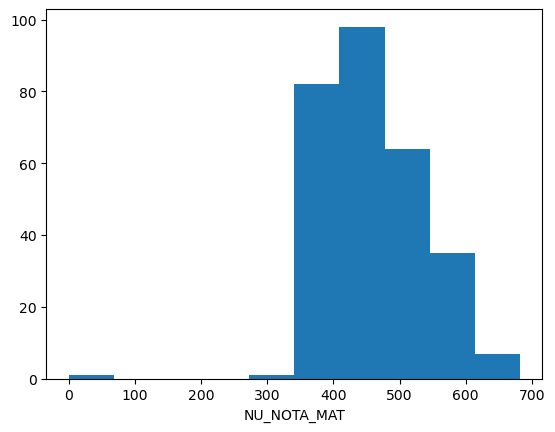

9809


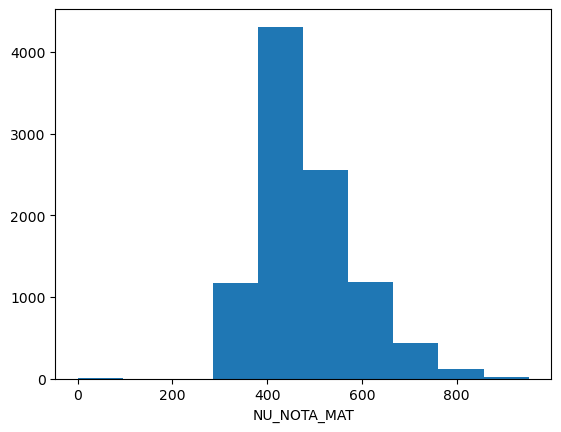

483.3479253746559


In [350]:
ano = mat[mat['TP_ST_CONCLUSAO'] == 4]
print(len(ano))

plt.hist(ano['NU_NOTA_MT'])
plt.xlabel('NU_NOTA_MAT')
plt.show()

ano = mat[mat['TP_ST_CONCLUSAO'] != 4]
print(len(ano))

plt.hist(ano['NU_NOTA_MT'])
plt.xlabel('NU_NOTA_MAT')
plt.show()
print(ano['NU_NOTA_MT'].mean())


In [351]:
trei = mat[mat['IN_TREINEIRO'] == 1]

#trei['TP_ANO_CONCLUIU'].unique()
print(trei['TP_ST_CONCLUSAO'].unique())
print(trei['TP_ANO_CONCLUIU'].unique())


# TREINEIRO E REDUNDANTE

mat = mat.drop(columns=['IN_TREINEIRO'])
mat.head()

[3]
[0]


,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1,24,1,4,1.0,436.3,495.4,581.2,399.4,520.0
1,2,17,2,0,1.0,474.5,544.1,599.0,459.8,580.0
5,1,18,1,1,1.0,439.7,583.2,410.9,364.5,620.0
6,2,18,2,0,1.0,420.1,604.2,484.5,529.2,560.0
7,1,18,1,1,1.0,619.6,625.8,611.2,566.7,620.0


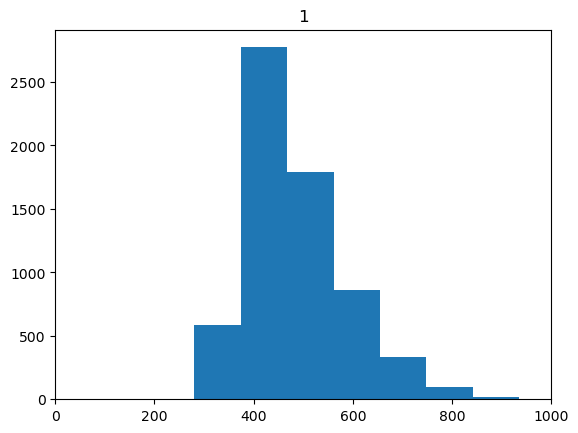

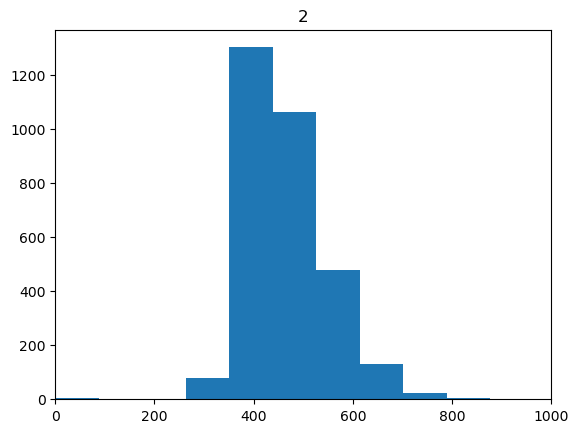

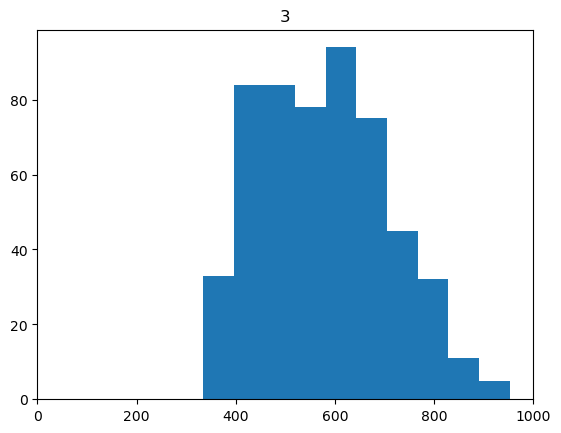

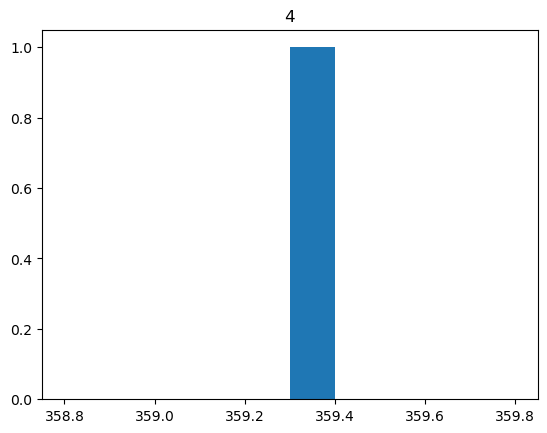

In [352]:

for i in range(4):
    esc = mat[mat['TP_ESCOLA'] == i+1]
    plt.hist(esc['NU_NOTA_MT'])
    if i < 3: plt.xlim(0, 1000)
    plt.title(i+1)
    plt.show()

mat['TP_ESCOLA'] = mat['TP_ESCOLA'].replace(2, 1)
mat['TP_ESCOLA'] = mat['TP_ESCOLA'].replace(3, 0)
mat['TP_ESCOLA'] = mat['TP_ESCOLA'].replace(4, 0)


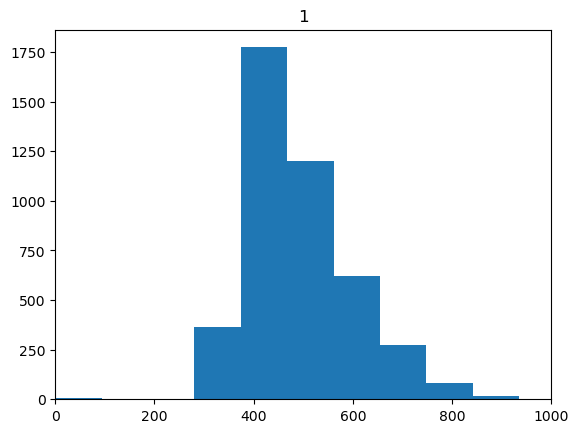

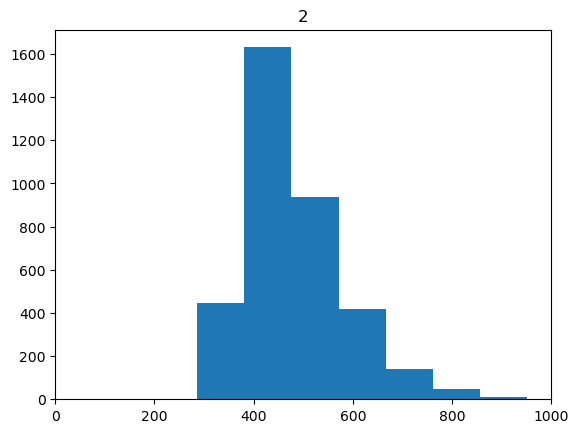

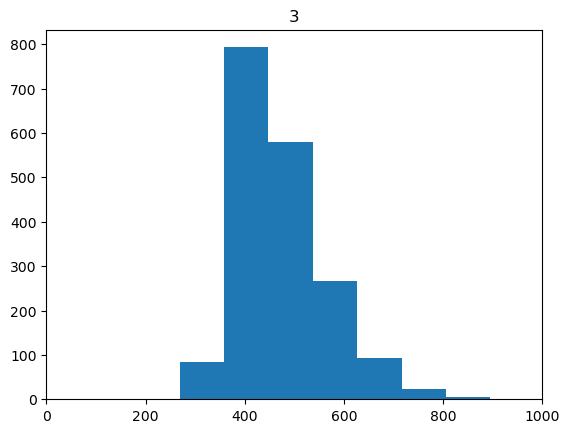

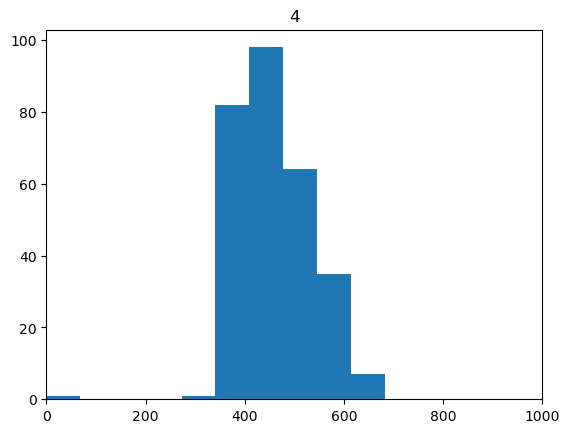

In [353]:
for i in range(4):
    esc = mat[mat['TP_ST_CONCLUSAO'] == i+1]
    plt.hist(esc['NU_NOTA_MT'])
    plt.xlim(0, 1000)
    plt.title(i+1)
    plt.show()

<AxesSubplot:>

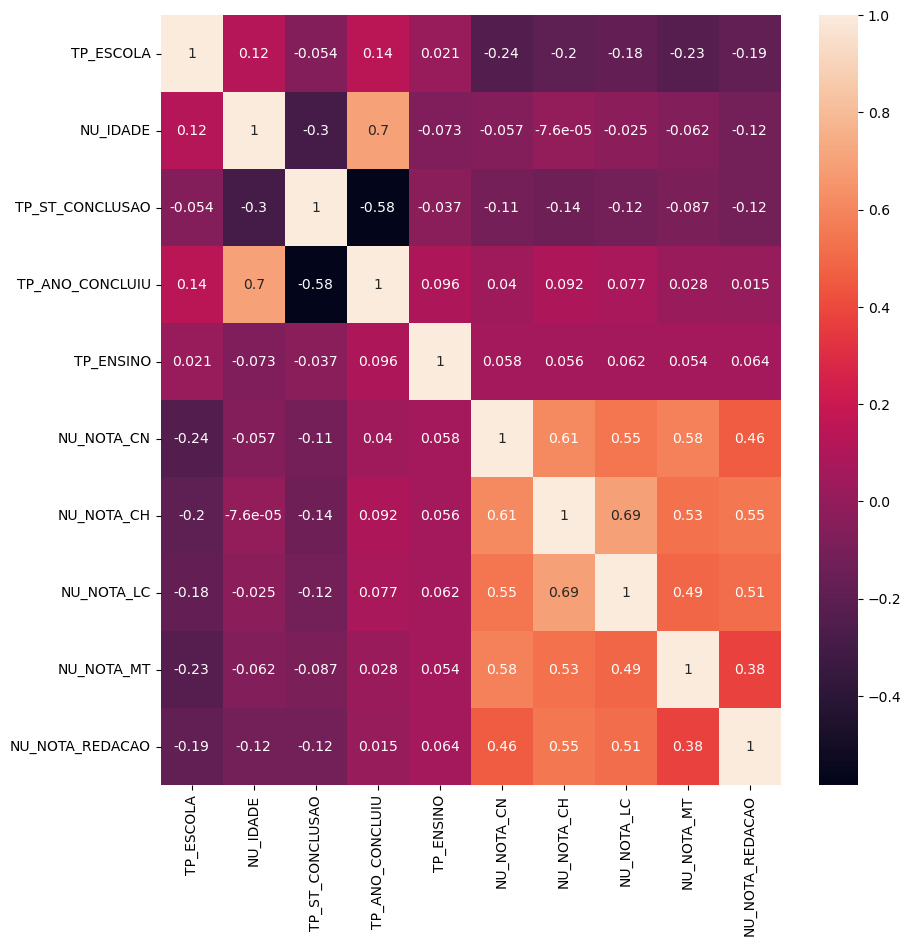

In [354]:
plt.figure(figsize=(10, 10))
sns.heatmap(mat.corr(), annot=True)

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [384]:
matnat = matnat.drop(columns=['IN_TREINEIRO'])
matnat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1,24,1,4,0.0,436.3,495.4,581.2,399.4,520.0
1,2,17,2,0,1.0,474.5,544.1,599.0,459.8,580.0
5,1,18,1,1,0.0,439.7,583.2,410.9,364.5,620.0
6,2,18,2,0,1.0,420.1,604.2,484.5,529.2,560.0
7,1,18,1,1,0.0,619.6,625.8,611.2,566.7,620.0
...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,0.0,438.2,419.7,394.5,403.2,440.0
13726,1,33,1,10,0.0,423.8,557.9,533.0,452.4,560.0
13727,1,15,3,0,0.0,460.5,528.9,569.3,398.0,600.0
13728,1,36,4,0,0.0,422.5,621.7,569.0,386.6,460.0


In [385]:
# Escalonando as variáveis

scaler = MinMaxScaler()
dfs = scaler.fit_transform(notas)
dfs = pd.DataFrame(dfs)
dfs.columns=notas.columns.values

dfs = notas
dfs = mat
dfs = matnat

In [386]:
# CASO MAIS SIMPLES UTILIZANDO APENAS AS NOTAS

X = dfs.drop(['NU_NOTA_MT'], axis=1) # features
y = dfs.NU_NOTA_MT # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [387]:
#X_train_cement = np.array(X_train['cement']).reshape(-1, 1)
regr = linear_model.LinearRegression() # Create regressor
regr.fit(X_train, y_train) # Train regressor

print('Intercepto:', regr.intercept_)
print('Coeficientes:', regr.coef_)
print('R^2 = ', regr.score(X_train, y_train)) # Coefficient of determination R^2

coef = regr.coef_

Intercepto: -2.2158716991984306
Coeficientes: [ 8.82266887 -0.67365631 -3.02134142  0.28060865 -9.24552561  0.54166392
  0.24157333  0.19912359  0.01374785]
R^2 =  0.40761949481073023


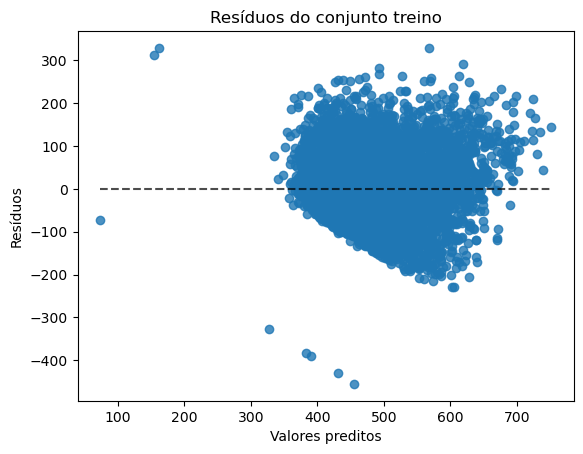

R^2 =  0.40761949481073023
MSE =  5887.929843563434
MAE =  60.65683696313136


In [388]:
y_pred = regr.predict(X_train)
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
display.plot()
plt.title('Resíduos do conjunto treino')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.savefig('train_nat', dpi=300)
plt.show()

print('R^2 = ', r2_score(y_train, y_pred))
print('MSE = ', mean_squared_error(y_train, y_pred))
print('MAE = ', mean_absolute_error(y_train, y_pred))

In [389]:
X_trainsm = sm.add_constant(X_train) # adicionar uma coluna constante para o statsmodels ajustar um itercepto
mod = sm.OLS(y_train, X_trainsm) # ajustar o modelo
regsm = mod.fit()
print(regsm.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     539.6
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        16:33:39   Log-Likelihood:                -40701.
No. Observations:                7067   AIC:                         8.142e+04
Df Residuals:                    7057   BIC:                         8.149e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2159      9.732     

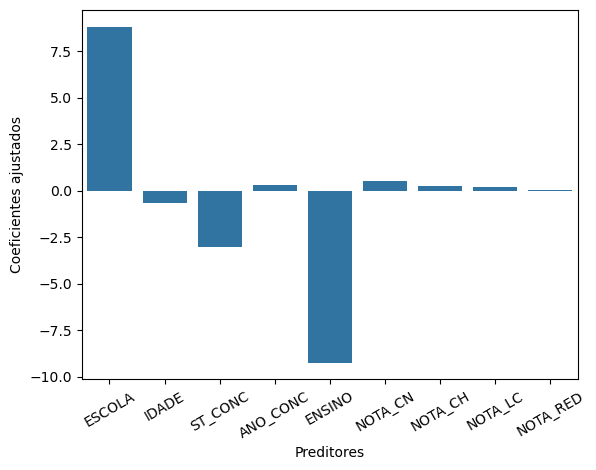

In [391]:
# Gráfico dos coeficientes ajustados
xlab = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
xall = ['ESCOLA', 'IDADE', 'ST_CONC', 'ANO_CONC', 'ENSINO', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_RED']
fig = sns.barplot (x=xall, y=coef)
plt.xticks(rotation=30)
plt.xlabel("Preditores")
plt.ylabel("Coeficientes ajustados")
plt.savefig('Par-nat')

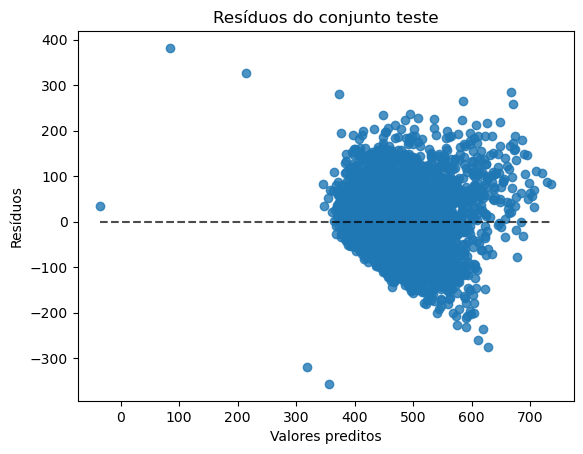

R^2 =  0.3954941294882097
MSE =  6001.7694194550795
MAE =  61.53529367909288


In [392]:
# Métricas de desempenho - conjunto de teste

y_pred_test = regr.predict(X_test)
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test)
display.plot()
plt.title('Resíduos do conjunto teste')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.savefig('test_nat', dpi=300)
plt.show()

print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

# R^2 =  0.394330319502883
# MSE =  5925.686444245279
# MAE =  60.730984527881205

In [364]:
# coefs = {
#     'Notas (treino)': [r2_score(y_train, y_pred).round(2), str(int(mean_squared_error(y_train, y_pred))), mean_absolute_error(y_train, y_pred).round(1)],
#     'Notas (teste)': [r2_score(y_test, y_pred_test).round(2), str(int(mean_squared_error(y_test, y_pred_test))), mean_absolute_error(y_test, y_pred_test).round(1)]
#     }
# dcoef = pd.DataFrame(coefs, index=['R²', 'MSE', 'MAE'])

dcoef['Todos (treino)'] = [r2_score(y_train, y_pred).round(2), str(int(mean_squared_error(y_train, y_pred))), mean_absolute_error(y_train, y_pred).round(1)]
dcoef['Todos (teste)'] = [r2_score(y_test, y_pred_test).round(2), str(int(mean_squared_error(y_test, y_pred_test))), mean_absolute_error(y_test, y_pred_test).round(1)]
dcoef

,Notas (treino),Notas (teste),Todos (treino),Todos (teste)
R²,0.4,0.39,0.41,0.4
MSE,5916,6032,5865,5965
MAE,60.8,61.7,60.5,61.4


In [365]:
clf_rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=True,
                             max_depth=1, # default
                             min_samples_split=2,
                             max_leaf_nodes=5)


clf_rf = RandomForestRegressor()

clf_rf.fit(X_train, y_train)

RandomForestRegressor()

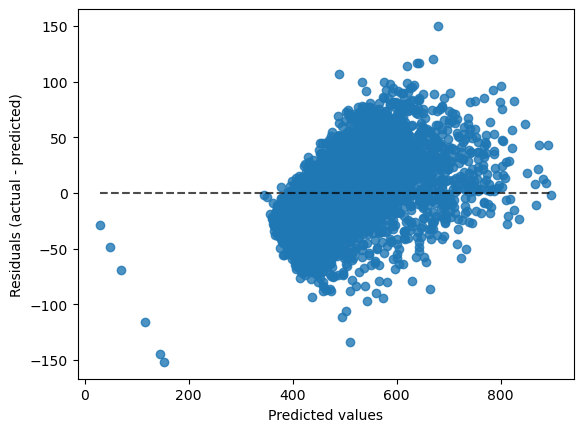

R^2 =  0.917813721831028
MSE =  816.8854912061701
MAE =  22.358478845337494


In [366]:
y_pred = clf_rf.predict(X_train)

display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
display.plot()
plt.show()

print('R^2 = ', r2_score(y_train, y_pred))
print('MSE = ', mean_squared_error(y_train, y_pred))
print('MAE = ', mean_absolute_error(y_train, y_pred))

In [367]:
X_trainsm = sm.add_constant(X_train) # adicionar uma coluna constante para o statsmodels ajustar um itercepto
mod = sm.OLS(y_train, X_trainsm) # ajustar o modelo
regsm = mod.fit()
print(regsm.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     544.6
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        15:59:50   Log-Likelihood:                -40687.
No. Observations:                7067   AIC:                         8.139e+04
Df Residuals:                    7057   BIC:                         8.146e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              38.9416     12.391     

Text(0, 0.5, 'Coeficientes ajustados')

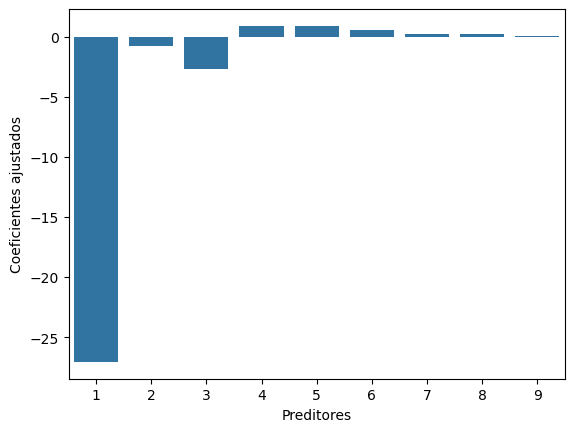

In [368]:
# Gráfico dos coeficientes ajustados
fig = sns.barplot (x=np.arange(1, len(coef)+1), y=coef)
plt.xlabel("Preditores")
plt.ylabel("Coeficientes ajustados")

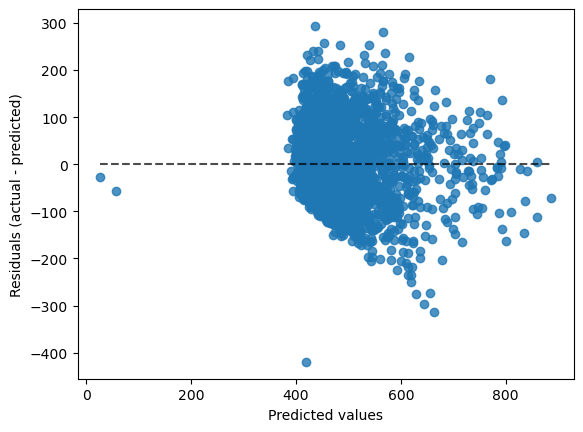

R^2 =  0.917813721831028
MSE =  816.8854912061701
MAE =  22.358478845337494

R^2 =  0.393638307466184
MSE =  6020.194742356106
MAE =  61.299606270627066


In [369]:
# Métricas de desempenho - conjunto de teste

y_pred_test = clf_rf.predict(X_test)
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test)
display.plot()
plt.show()

print('R^2 = ', r2_score(y_train, y_pred))
print('MSE = ', mean_squared_error(y_train, y_pred))
print('MAE = ', mean_absolute_error(y_train, y_pred))
print()
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))


In [370]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

clf_rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [450, 500, 550],
    'max_depth': [4, 5, 6],
}

# Realizar a busca em grade com validação cruzada
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor estimador
best_rf = grid_search.best_estimator_

# Treinar o modelo com os melhores hiperparâmetros
best_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de treino e teste
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calcular o MSE para o conjunto de treino e teste
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('MSE no conjunto de treino:', mse_train)
print('MSE no conjunto de teste:', mse_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ......................max_depth=4, n_estimators=450; total time=   6.9s
[CV] END ......................max_depth=4, n_estimators=450; total time=   6.5s
[CV] END ......................max_depth=4, n_estimators=450; total time=   6.6s
[CV] END ......................max_depth=4, n_estimators=500; total time=   7.1s
[CV] END ......................max_depth=4, n_estimators=500; total time=   7.5s
[CV] END ......................max_depth=5, n_estimators=450; total time=   7.7s
[CV] END ......................max_depth=4, n_estimators=550; total time=   7.8s
[CV] END ......................max_depth=4, n_estimators=550; total time=   7.7s
[CV] END ......................max_depth=4, n_estimators=500; total time=   7.7s
[CV] END ......................max_depth=5, n_estimators=450; total time=   8.2s
[CV] END ......................max_depth=5, n_estimators=450; total time=   8.0s
[CV] END ......................max_depth=4, n_est

In [371]:
print(best_rf)

RandomForestRegressor(max_depth=6, n_estimators=450)
